<a href="https://colab.research.google.com/github/Priyanshuu-2109/ML_algorithmsFromScratch/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [14]:
import matplotlib.pyplot as plt
import numpy as np

#Defining custom covariance matrix with redundant features

In [18]:
# Generate dataset such that few of the features are redundance and have low variance
# Define a 10x10 Covariance Matrix
covariance = np.array([
    [1.0,  0.8,  0.2,  0.0,  0.0,  0.5,  0.1,  0.0,  0.0,  0.0], #important
    [0.8,  1.0,  0.3,  0.0,  0.0,  0.6,  0.1,  0.0,  0.0,  0.0], #important
    [0.2,  0.3,  1.0,  0.0,  0.0,  0.1,  0.7,  0.0,  0.0,  0.0], #important
    [0.0,  0.0,  0.0,  1.0,  0.7,  0.0,  0.0,  0.3,  0.0,  0.0], #Corelated
    [0.0,  0.0,  0.0,  0.7,  1.0,  0.0,  0.0,  0.3,  0.0,  0.0], #Corelated
    [0.5,  0.6,  0.1,  0.0,  0.0,  1.0,  0.0,  0.0,  0.2,  0.0], #Important
    [0.1,  0.1,  0.7,  0.0,  0.0,  0.0,  1.0,  0.0,  0.3,  0.0], #Corelated
    [0.0,  0.0,  0.0,  0.3,  0.3,  0.0,  0.0,  0.5,  0.0,  0.0], #Corelated
    [0.0,  0.0,  0.0,  0.0,  0.0,  0.2,  0.3,  0.0,  0.3,  0.0], #Corelated
    [0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.2]  #redundant; low variance
])

mean = np.array([10,15,-6,5,2,1,99,69,39,5]) #Mean of the random data
dataset = np.random.multivariate_normal(mean, covariance, 1000)

#Random Dataset creation

In [3]:
# Creating a dataset. Dimension of dataset = 1000*10
number_of_samples = 1000
dataset = np.random.randint(-50,100,(1000,10)) # dataset of 1000 points each point is 10 in 10 dimensional space and values of coordinations is between -50 to 100
dataset

array([[ 86,  40,  13, ...,  63,   1,  29],
       [-49, -36,  57, ...,  64,  56,  94],
       [ 62,  13,  38, ..., -12,  75,  57],
       ...,
       [ 46,  89,  -7, ..., -40, -50, -46],
       [ 82,   9, -46, ..., -26, -14, -11],
       [  7,  49, -24, ...,  42,  67, -38]])

#Calculation of mean of data across each dimension

In [19]:
# Mean of each feature(column) in the dataset
mean = np.mean(dataset, axis = 0)
print(mean.shape)
print(mean)

(10,)
[10.00346659 15.01798301 -5.9930575   5.00828849  2.01188341  1.03678297
 99.016488   69.01146789 39.01288435  5.00455187]


#Centering the data (by subtracting the mean)

In [20]:
X_bar = dataset-mean
print(X_bar)
print(X_bar.shape)

[[-8.96887048e-03 -7.26211258e-01  4.46013527e-01 ...  5.06209196e-02
  -4.56288439e-01  7.10575928e-01]
 [-1.54419344e-03 -4.46513887e-01 -1.41977458e-01 ... -2.08826586e-01
   5.93060737e-01  3.69373862e-01]
 [-3.67031240e-02  5.16680246e-01 -1.01310269e+00 ... -1.53338527e+00
   1.85426681e-01  2.54215539e-01]
 ...
 [-9.53978775e-01 -1.68970847e+00  7.36373626e-01 ... -7.99202542e-01
   2.75458274e-01 -2.54998551e-01]
 [-8.32653120e-02  1.48111587e-01  7.37619002e-01 ...  9.77153077e-01
  -4.44168780e-02 -5.17298352e-01]
 [-1.82050645e-01 -6.98166410e-01 -8.46695160e-02 ... -2.34461106e-02
  -5.50666157e-02  1.08060511e-01]]
(1000, 10)


#Calculation of covariance matrix

In [21]:
covariance_matrix = X_bar.T @ X_bar
print(covariance_matrix)
print(covariance_matrix.shape) # Shape should be (number of features, number of features); 10*10 in our case

[[ 986.25494194  781.14317371  228.09287928  -31.03177048  -13.29909518
   473.01538138  105.59743707  -37.26951857   -7.89231387  -15.58463594]
 [ 781.14317371 1022.33799269  349.28616037   -3.75214247   44.26427011
   595.33295479  105.82868459  -47.99269946  -25.28341519  -19.73500793]
 [ 228.09287928  349.28616037  967.7469978   -59.31676089  -53.2062256
   100.98565057  680.9795393   -41.93574718   -4.70328714  -13.32591401]
 [ -31.03177048   -3.75214247  -59.31676089 1014.30612253  727.17510377
     8.58482943  -61.21157119  292.11524497  -12.72172791    2.85591126]
 [ -13.29909518   44.26427011  -53.2062256   727.17510377 1041.52953211
    42.26031011  -57.64551821  286.99265329   -7.35664717   11.77319982]
 [ 473.01538138  595.33295479  100.98565057    8.58482943   42.26031011
  1051.67618394  -16.87369638  -25.01095646  208.95929416  -10.40670184]
 [ 105.59743707  105.82868459  680.9795393   -61.21157119  -57.64551821
   -16.87369638  975.78692254  -46.46306889  290.31640163  

#Calculation of eigenvalues and eigenvectors of covariance matrix

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(eigenvalues)
print(eigenvectors)
print('Eigenvalues matrix shape - ',eigenvalues.shape) # Each dimension has a eigenvalue associated with it which gives the idea of the importance of that dimension in the data distribution. So size sould be 10*1
print('Eigenvector matrix shape - ', eigenvectors.shape) # Eigen vector corresponding to each of the eigen values. Eigenvectors are arranged in column. Shape should be (No. of features * No. of features)


[2470.0425994  1908.90722335 1486.56958254  715.11175307   29.1910235
  173.20809997  201.00769478  401.89469492  373.80548867  300.41570749]
[[ 5.17314586e-01  9.22448294e-02  2.09098469e-01 -3.36180247e-01
   6.07835520e-02  5.18858485e-01  8.71699904e-02 -5.28203484e-01
  -8.17989991e-02 -3.06563455e-02]
 [ 5.67439560e-01  1.27461637e-01  1.80876779e-01 -2.58506117e-01
   4.67944316e-02 -7.33360489e-01 -1.04147553e-01  6.93773116e-02
   6.13450299e-02  5.28544519e-02]
 [ 3.63045780e-01 -1.30250604e-01 -5.43835218e-01 -2.02161734e-01
   3.65335604e-01  2.62147491e-01  3.51086505e-02  5.56017189e-01
  -1.27169332e-02 -4.31922206e-02]
 [-7.20861214e-02  6.36857451e-01 -2.03494474e-01 -1.28048701e-02
   1.04615138e-03 -4.05054243e-02  2.51564007e-02 -4.42454289e-02
   1.23472430e-01 -7.26749259e-01]
 [-4.74668632e-02  6.54001030e-01 -1.93851899e-01  3.41003958e-03
   2.59988339e-03  1.04857497e-01 -3.99226122e-02  5.34050339e-03
   2.66772436e-01  6.69811646e-01]
 [ 4.42978925e-01  1.52

#Sorting and visualizing magnitude of eigen values graphically

Text(0.5, 0, 'Magnitude of the eigenvalue')

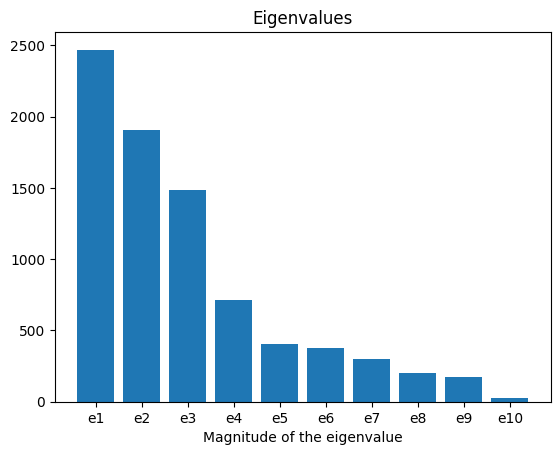

In [25]:
#Sorting the eigen values in descending order and plotting the eigen values for visualization

sorted_indices = np.argsort(eigenvalues)[::-1] # returns the indices of eigen values in sorted order
sorted_eigenvalues = eigenvalues[sorted_indices] # rearranges all the eigenvalues in the decreasing order. (this is required if we want to drop the lower order dimensions where the variation is less).
sorted_eigenvectors = eigenvectors[:, sorted_indices] # rearranges all the eigen vectors (columns) according to the magnitude of eigen values

plt.bar(["e" + str(i+1) for i in range(len(eigenvalues))], sorted_eigenvalues)
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")


#Analysing information content in each dimension

In [28]:
# How much information content is preserved if we drop last few columns - Comparison
sum = np.sum(sorted_eigenvalues)
curr = sum
for i in range(len(sorted_eigenvalues)-1,0,-1):
  curr = curr - sorted_eigenvalues[i]
  print('On retaining only first',str(i),'features, information content preserved = ',curr/sum*100)



On retaining only first 9 features, information content preserved =  99.63783540642083
On retaining only first 8 features, information content preserved =  97.48889255975101
On retaining only first 7 features, information content preserved =  94.99504817317799
On retaining only first 6 features, information content preserved =  91.26787729747501
On retaining only first 5 features, information content preserved =  86.63018061315341
On retaining only first 4 features, information content preserved =  81.64398926353228
On retaining only first 3 features, information content preserved =  72.77180437961904
On retaining only first 2 features, information content preserved =  54.328365123418756
On retaining only first 1 features, information content preserved =  30.645104795041423


# Dropping the dimensions in which less variation is there

In [30]:
# Observation - 91% information of dataset distruibution can be explained only in terms of first 4 features. (I am okay with if my data is only 90 percent accurate but i am able to reduce the computation)
#Retaining only the first 4 features and dropping the last 6 eignvalues and eigen vextors

principal_eigenvalues = sorted_eigenvalues[:4]
principal_eigenvectors = sorted_eigenvectors[:,:4]

print(principal_eigenvalues.shape)
print(principal_eigenvectors.shape)


(4,)
(10, 4)


# Projecting the 10 dimensional data to the 4 dimensional space

In [33]:
# Projecting the data on the 4 dimensional space
projected_data = np.dot(X_bar, principal_eigenvectors)
print(projected_data.shape) # each 10 dimensional point should get mapped to a corresponding 4 dimensional point. so shape should be (Number of data samples, 4)
print(projected_data)

(1000, 4)
[[-1.05397593 -1.69259065 -0.69643241 -1.47885315]
 [ 0.00750143 -0.69121907  0.24137243  0.78275595]
 [-0.03547046  1.58483936  0.68193722  0.44279649]
 ...
 [-1.33206561 -0.90724352 -1.78993426  0.29763021]
 [ 0.30556359  0.78626222 -0.15798887  0.01609508]
 [-0.17481836 -1.19083641  0.64795239  0.62122001]]


#Reconstructing the data back to 10 dimensional space (optional)

In [34]:
# Reconstructing the data back -
reconstructed_data = np.dot(projected_data, principal_eigenvectors.T) + mean #mean should be added. dont forget it
print(reconstructed_data.shape)
print(reconstructed_data)

#difference between original data and reconstructed data

difference = dataset - reconstructed_data
print(difference.shape)
print(difference) #difference of each individual coordinate is much smaller than the magnitide of the original cordinate (~10% error in each value). So, most of the data is retained

(1000, 10)
[[ 9.65363499 14.46049913 -5.47752608 ... 68.72489266 38.28077845
   5.00869988]
 [ 9.73090932 14.77544717 -6.18981257 ... 68.78720204 39.41576187
   5.00469846]
 [10.12504303 15.20874289 -6.67273917 ... 69.36420523 39.13024485
   5.01162406]
 ...
 [ 8.75635118 13.74578077 -5.44522943 ... 68.99603472 39.29113434
   5.02123017]
 [10.19562163 15.25885296 -5.90186896 ... 69.21396265 39.03960672
   5.00303582]
 [ 9.72982595 14.72360857 -6.37938365 ... 68.63587247 39.28746566
   5.00493683]]
(1000, 10)
[[ 0.34086272 -0.16872738 -0.0695179  ...  0.33719614  0.27581746
   0.70642791]
 [ 0.27101307 -0.20397805  0.05477761 ...  0.01543926  0.19018322
   0.36922727]
 [-0.15827957  0.32592037 -0.33342103 ... -1.88612261  0.06806618
   0.24714334]
 ...
 [ 0.29313663 -0.41750623  0.18854556 ... -0.78376938 -0.00279172
  -0.27167685]
 [-0.27542036 -0.09275836  0.64643046 ...  0.77465831 -0.07113925
  -0.5157823 ]
 [ 0.09158999 -0.40379197  0.30165663 ...  0.35214931 -0.32964792
   0.10767

#Verification to check if the manual implementation of PCA is correct or not




In [37]:
#Using built in function -
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=4)  # Change to desired dimension
X_pca = pca.fit_transform(X_bar)

# Print results
print("Original shape:", X_bar.shape)
print("Transformed shape:", X_pca.shape)
print(X_pca-projected_data) #all the values should be very small ~0 if the manual implementation is correct
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))


Original shape: (1000, 10)
Transformed shape: (1000, 4)
[[-6.21724894e-15  9.76996262e-15  1.39286481e+00  7.32747196e-15]
 [-6.23459617e-15  3.88578059e-15 -4.82744863e-01  5.77315973e-15]
 [-5.71070968e-15  2.44249065e-15 -1.36387443e+00  8.32667268e-15]
 ...
 [-7.54951657e-15  1.02140518e-14  3.57986852e+00  5.88418203e-15]
 [-6.21724894e-15  4.99600361e-15  3.15977738e-01  5.41580669e-15]
 [-6.35602682e-15  3.33066907e-15 -1.29590477e+00  6.66133815e-15]]
Explained variance ratio: [0.30645105 0.2368326  0.18443439 0.08872185]
Cumulative explained variance: [0.30645105 0.54328365 0.72771804 0.81643989]
